# Perguntas a serem respondidas

1. Quais são as maiores causas de ocorrências e, eventualmente, queda de aviões?
2. Como tem sido a progressão desses casos nos últimos anos? Tiveram menos ocorrências ou mais?
3. Quais os estados que mais possuem ocorrências registradas?
4. Qual tipo de aeronave possui mais problemas? Aviões, jatos, planadores?
5. Quais as fabricantes com maior número de defeitos registrados?
6. Será que durante o pouso é mais comum ter problemas do que durante a decolagem? Ou durante a viagem em si é mais frequente surgir defeitos?
7. Viagens comerciais regulares tendem a ter mais problemas do que voos fretados?
8. Quantos incidentes com fatalidades (morte de passageiros e tripulação) temos registro nos últimos 10 anos?


In [1]:
#carregando datasets
import pandas as pd

In [35]:
aeronaves_dataset = pd.read_csv('DataSet/aeronave.csv', encoding='utf-8')
ocorrencia_dataset = pd.read_csv('DataSet/ocorrencia.csv', encoding='utf-8')

In [36]:
aeronaves_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 22 columns):
codigo_aeronave           2043 non-null int64
codigo_ocorrencia         2043 non-null int64
matricula                 2043 non-null object
codigo_operador           2043 non-null int64
equipamento               2043 non-null object
fabricante                2043 non-null object
modelo                    2043 non-null object
tipo_motor                2043 non-null object
quantidade_motores        2034 non-null float64
peso_maximo_decolagem     2043 non-null int64
quantidade_assentos       2025 non-null float64
ano_fabricacao            2039 non-null float64
pais_registro             2043 non-null object
categoria_registro        2043 non-null object
categoria_aviacao         2043 non-null object
origem_voo                2043 non-null object
destino_voo               2043 non-null object
fase_operacao             2043 non-null object
tipo_operacao             2043 non-null object
n

In [37]:
ocorrencia_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2027 entries, 0 to 2026
Data columns (total 19 columns):
codigo_ocorrencia           2027 non-null int64
classificacao               2027 non-null object
tipo                        2027 non-null object
localidade                  2027 non-null object
uf                          2027 non-null object
pais                        2027 non-null object
aerodromo                   2024 non-null object
dia_ocorrencia              2027 non-null object
horario                     2027 non-null object
sera_investigada            2027 non-null object
comando_investigador        2027 non-null object
status_investigacao         1821 non-null object
numero_relatorio            1821 non-null object
relatorio_publicado         995 non-null float64
dia_publicacao              995 non-null object
quantidade_recomendacoes    2027 non-null int64
aeronaves_envolvidas        2027 non-null int64
saida_pista                 256 non-null float64
dia_extracao   

In [38]:
ocorrencia_dataset.head()

,codigo_ocorrencia,classificacao,tipo,localidade,uf,pais,aerodromo,dia_ocorrencia,horario,sera_investigada,comando_investigador,status_investigacao,numero_relatorio,relatorio_publicado,dia_publicacao,quantidade_recomendacoes,aeronaves_envolvidas,saida_pista,dia_extracao
0,47965,ACIDENTE,FALHA DO MOTOR EM VOO,ARIQUEMES,RO,BRASIL,SJOG,2013-05-05,11:00:00,***,SERIPA-7,NaN,NaN,NaN,NaN,0,1,NaN,2016-07-30
1,50313,INCIDENTE GRAVE,POUSO SEM TREM,CACOAL,RO,BRASIL,SSKW,2013-11-25,12:32:00,SIM,SERIPA-7,FINALIZADA,IG-209/CENIPA/2013,1.0,2014-04-07,0,1,NaN,2016-07-30
2,34078,ACIDENTE,PERDA DE CONTROLE NO SOLO,CEREJEIRAS,RO,BRASIL,****,2008-08-07,15:10:00,SIM,SERIPA-7,FINALIZADA,A - 517/CENIPA/2016,1.0,2016-07-07,0,1,1.0,2016-07-30
3,44988,ACIDENTE,POUSO LONGO,AMAJARI,RR,BRASIL,****,2011-08-11,17:00:00,SIM,SERIPA-7,FINALIZADA,A-105/CENIPA/2012,1.0,2012-09-20,4,1,NaN,2016-07-30
4,38855,ACIDENTE,PERDA DE CONTROLE EM VOO,ACEGUÁ,RS,BRASIL,****,2009-12-28,17:30:00,SIM,SERIPA-5,ATIVA,A DEFINIR,NaN,NaN,0,1,NaN,2016-07-30


In [39]:
ocorrencia_dataset.groupby(['tipo', 'classificacao']).count()

codigo_ocorrencia  \
tipo                                           classificacao                        
AERONAVE ATINGIDA POR OBJETO                   INCIDENTE GRAVE                  2   
CAUSADO POR FENÔMENO METEOROLÓGICO EM VOO      ACIDENTE                        21   
                                               INCIDENTE GRAVE                  6   
CAUSADO POR FENÔMENO METEOROLÓGICO NO SOLO     ACIDENTE                         3   
CFIT - COLISÃO EM VOO CONTROLADO COM O TERRENO ACIDENTE                        21   
COLISÃO COM AERONAVE NO SOLO                   ACIDENTE                         5   
                                               INCIDENTE GRAVE                  3   
COLISÃO COM OBSTÁCULO NO SOLO                  ACIDENTE                        32   
                                               INCIDENTE GRAVE                  8   
COLISÃO COM PÁSSARO                            ACIDENTE                         4   
                                               INCIDENTE GRAVE                  1   
COLISÃO DE AERONAVES EM VOO                    ACIDENTE                         6   
COLISÃO DE VEÍCULO COM AERONAVE                INCIDENTE GRAVE                  1   
COLISÃO EM VOO COM OBJETO REBOCADO             INCIDENTE GRAVE                  1   
COLISÃO EM VOO COM OBSTÁCULO                   ACIDENTE                       127   
                                               INCIDENTE GRAVE                 15   
COM COMANDOS DE VOO                            ACIDENTE                         7   
                                               INCIDENTE GRAVE                  1   
COM HÉLICE                                     ACIDENTE                         7   
                                               INCIDENTE GRAVE                  4   
COM LANÇAMENTO DE CARGA                        ACIDENTE                         1   
COM LANÇAMENTO DE PESSOAS                      ACIDENTE                         1   
COM PESSOAL EM VOO                             ACIDENTE                         1   
                                               INCIDENTE GRAVE                  1   
COM PÁRA-BRISAS / JANELA / PORTA               ACIDENTE                         2   
                                               INCIDENTE GRAVE                  3   
COM ROTOR                                      ACIDENTE                         1   
                                               INCIDENTE GRAVE                  2   
COM TREM DE POUSO                              ACIDENTE                        47   
                                               INCIDENTE GRAVE                 83   
...                                                                           ...   
MANOBRAS A BAIXA ALTURA                        ACIDENTE                        16   
OUTROS TIPOS                                   ACIDENTE                        67   
                                               INCIDENTE GRAVE                 20   
PANE SECA                                      ACIDENTE                        59   
                                               INCIDENTE GRAVE                 15   
PERDA DE COMPONENTE EM VOO                     ACIDENTE                        13   
                                               INCIDENTE GRAVE                 14   
PERDA DE COMPONENTE NO SOLO                    ACIDENTE                         4   
                                               INCIDENTE GRAVE                  2   
PERDA DE CONTROLE EM VOO                       ACIDENTE                       294   
                                               INCIDENTE GRAVE                 16   
PERDA DE CONTROLE NO SOLO                      ACIDENTE                       201   
                                               INCIDENTE GRAVE                124   
POUSO ANTES DA PISTA                           ACIDENTE                        11   
                                               INCIDENTE GRAVE       

In [40]:
df_agrupamento_incididentes = ocorrencia_dataset.groupby(['tipo', 'classificacao'])['classificacao'].agg(['count']).sort_values('count', ascending = False)

In [41]:
df_agrupamento_incididentes

,,count
tipo,classificacao,
FALHA DO MOTOR EM VOO,ACIDENTE,301
PERDA DE CONTROLE EM VOO,ACIDENTE,294
PERDA DE CONTROLE NO SOLO,ACIDENTE,201
COLISÃO EM VOO COM OBSTÁCULO,ACIDENTE,127
PERDA DE CONTROLE NO SOLO,INCIDENTE GRAVE,124
COM TREM DE POUSO,INCIDENTE GRAVE,83
FALHA DO MOTOR EM VOO,INCIDENTE GRAVE,76
OUTROS TIPOS,ACIDENTE,67
PANE SECA,ACIDENTE,59


In [42]:
# Merge dos DataSets

acidentes_dataframe = pd.merge(ocorrencia_dataset, aeronaves_dataset, left_on=['codigo_ocorrencia'], right_on=['codigo_ocorrencia'],how='inner')


In [43]:
# Ocorrência por 

df_ocorrencia_classificacao =  ocorrencia_dataset.groupby(['classificacao'])['classificacao'].agg(['count']).sort_values('count', ascending = False)

In [44]:

df_ocorrencia_classificacao.head()

,count
classificacao,
ACIDENTE,1475
INCIDENTE GRAVE,552


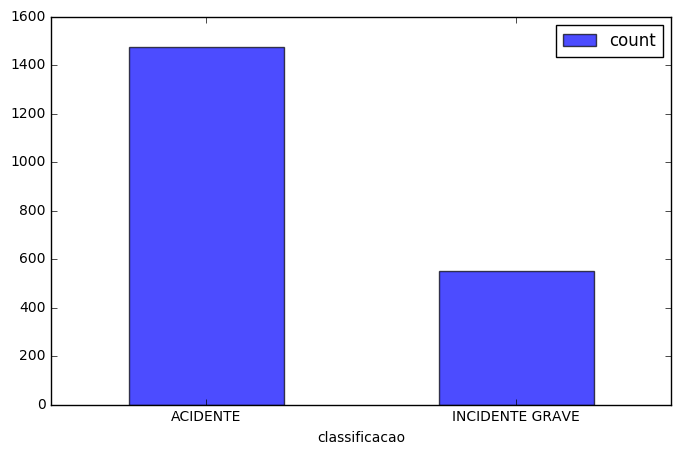

In [49]:
import matplotlib.pyplot as plt #Para plotagem
import random

df_ocorrencia_classificacao.plot(kind='bar', figsize=(8,5), alpha=.7)

plt.xticks(rotation=0)
#plt.xlabel('CLASSIFICAÇÃO DA OCORRÊNCIA')
#lt.ylabel('QUANTIDADE')
#plt.title('QUANTIDADE DE OCORRÊNCIAS POR CLASSIFICAÇÃO \n Total: ' + str(df_ocorrencia_classificacao['count'].sum()) + ' ocorrências')
plt.show()